# Load images from new Echelle

## Imports and Setup

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import os

In [35]:
# Don't know how to import locally, so I just use %run
%run ../tools/echelle.py

<Figure size 432x288 with 0 Axes>

In [48]:
files_fujii = {
    "orders": "pattern_fujii-1.txt",
    "wavelength": "",
    "sphr": "LED.tif",
    "bkgr": "LED_bkg.tif",
    "integral": "LED.tif",
}

In [107]:
%run ../tools/echelle.py
folder = './data'
#crop = [1400,2600]
#files_fujii['orders'] = "pattern_fujii.txt"
crop = [1300,2950]
files_fujii['orders'] = "pattern_fujii-1.txt"

cb = Calibrations(folder,files_fujii,spec='fujii',dv=17,crop=crop)
cb.start_cut()

In [87]:
im = EchelleImage('./data/LED.tif',clbr=cb,spec='fujii',crop=crop)

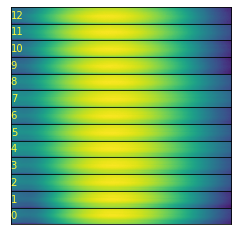

In [88]:
im.plot_cut_image(0,aspect=5)

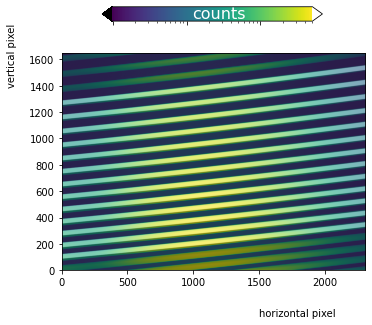

In [89]:
im.plot_frame(0,pattern=True,dark=True)
#plt.savefig('./out/oldcropled.png',bbox_inches='tight')

In [91]:
im.calculate_order_spectra()

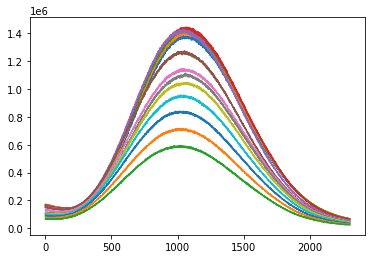

In [92]:
_ = [plt.plot(s) for s in im.order_spectra[0]]

In [108]:
h2 = EchelleImage('./data/H2-lamp-Fulcher-1s--20C.tif',clbr=cb,spec='fujii',crop=crop)
h2.calculate_order_spectra()

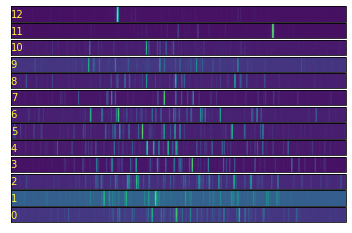

In [112]:
h2.plot_cut_image(0,aspect=3,scale=1,norm='log')
#plt.savefig('./out/newcroph2cut.png',bbox_inches='tight')


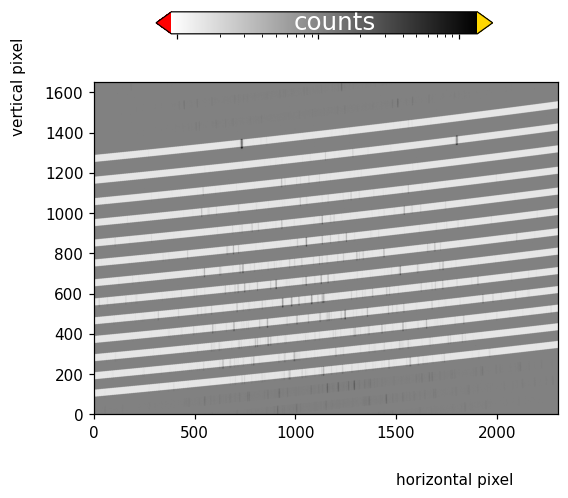

In [96]:
h2.plot_frame(0,pattern=True,dark=False,aspect=4)
plt.gcf().set_dpi(110)
#plt.savefig('./out/newcroph2.png',bbox_inches='tight')

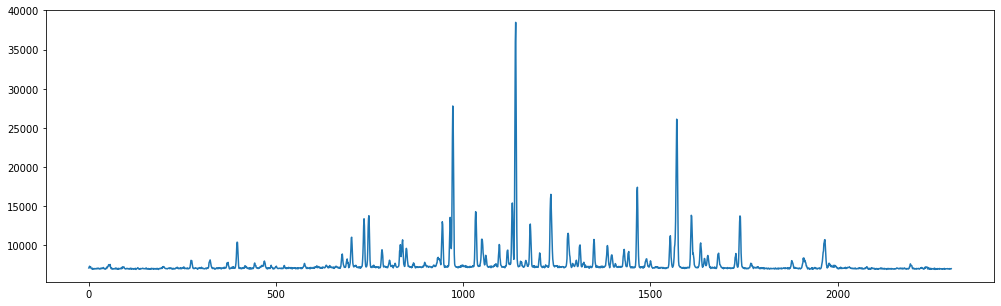

In [64]:
fig = plt.gcf()
fig.set_size_inches([17,5])
plt.plot(h2.order_spectra[0,0])